# File Types in Neuroimaging

-DICOM (.dcm)<br>
-NIfTI (.nii, .nii.gz)<br>
-PAR/REC<br>
-Analyze<br>
-NRRD<br>

 **DICOM (Digital Imaging and Communications in Medicine) format**<br>
 -Standarized image representation<br>
 -Formats of files from the scanners or hospital PACS (Picture archiving and communication system)<br>
 -Includes metadata and imagedata(in pixels)<br>

**Lets look at the dataset structure of overall files**

In [1]:
 #Import the os module, for the os.walk function
import os
 
# Set the directory you want to start from
rootDir = './Neurohacking_data-0.0/'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        print('\t%s' % fname)

Found directory: ./Neurohacking_data-0.0/
	README.csv
	.DS_Store
Found directory: ./Neurohacking_data-0.0/BRAINIX
Found directory: ./Neurohacking_data-0.0/BRAINIX/NIfTI
	BRAINIX_NIFTI_T1.nii.gz
	BRAINIX_NIFTI_ROI.nii.gz
	.DS_Store
	BRAINIX_NIFTI_T2.nii.gz
	BRAINIX_NIFTI_FLAIR.nii.gz
	BRAINIX_NIFTI_Output_3D_File.nii.gz
Found directory: ./Neurohacking_data-0.0/BRAINIX/DICOM
	.DS_Store
Found directory: ./Neurohacking_data-0.0/BRAINIX/DICOM/ROI
	BRAINIX_DICOM_ROI_IM-0001-0004.dcm
	BRAINIX_DICOM_ROI_IM-0001-0005.dcm
	BRAINIX_DICOM_ROI_IM-0001-0001.dcm
	BRAINIX_DICOM_ROI_IM-0001-0002.dcm
	.DS_Store
	BRAINIX_DICOM_ROI_IM-0001-0018.dcm
	BRAINIX_DICOM_ROI_IM-0001-0006.dcm
	BRAINIX_DICOM_ROI_IM-0001-0009.dcm
	BRAINIX_DICOM_ROI_IM-0001-0016.dcm
	BRAINIX_DICOM_ROI_IM-0001-0019.dcm
	BRAINIX_DICOM_ROI_IM-0001-0008.dcm
	BRAINIX_DICOM_ROI_IM-0001-0010.dcm
	BRAINIX_DICOM_ROI_IM-0001-0003.dcm
	BRAINIX_DICOM_ROI_IM-0001-0020.dcm
	BRAINIX_DICOM_ROI_IM-0001-0014.dcm
	BRAINIX_DICOM_ROI_IM-0001-0017.dcm
	BR

**-The pixel data in a DICOM file is a matrix (fixed rows and columns)<br>**
**-One DICOM file = one 'slice' of the brain**<br>
**-The pydicom is used in Python to read these data**

In [2]:
try:

    from pydicom import dcmread
    dicom_dir = './Neurohacking_data-0.0/BRAINIX/DICOM/'
    try:
        slice = dcmread('./Neurohacking_data-0.0/BRAINIX/DICOM/FLAIR/BRAINIX_DICOM_FLAIR_IM-0001-0011.dcm')
        print(slice)
    except:
        print("Make sure you have pulled lfs files 'git lfs pull' ")

except:
    print("Install pydicom (pip install pydicom")

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 210
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.0.0.11.4.2.0.8743.5.5396.2006120114313982544
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'OSIRIX'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_IR', 'M', 'IR']
(0008, 0012) Instance Creation Date              DA: '20061201'
(0008, 0013) Instance Creation Time              TM: '145321.000000'
(0008, 0014) I

In [3]:
print(type(slice))

<class 'pydicom.dataset.FileDataset'>


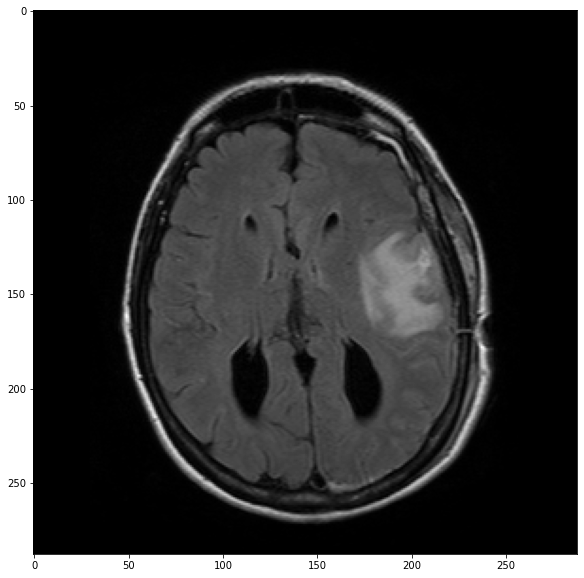

In [4]:
#displaying 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

arr = slice.pixel_array
plt.imshow(arr, cmap='gray')
plt.show()